### Required libraries

In [1]:
# Instalar Conda en Colab
!pip install -q condacolab
import condacolab
condacolab.install()

⏬ Downloading https://github.com/jaimergp/miniforge/releases/download/24.11.2-1_colab/Miniforge3-colab-24.11.2-1_colab-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:14
🔁 Restarting kernel...


In [2]:
# Instalar GMT y PyGMT desde el canal conda-forge
!mamba install -c conda-forge pygmt gmt


Looking for: ['pygmt', 'gmt']

[+] 0.0s
conda-forge/linux-64  ⣾  
conda-forge/noarch    ⣾  [+] 0.1s
conda-forge/linux-64  ⣾  
conda-forge/noarch    ⣾  [+] 0.2s
conda-forge/linux-64   2%
conda-forge/noarch     1%[+] 0.3s
conda-forge/linux-64   5%
conda-forge/noarch     5%[+] 0.4s
conda-forge/linux-64  11%
conda-forge/noarch     9%[+] 0.5s
conda-forge/linux-64  14%
conda-forge/noarch    20%[+] 0.6s
conda-forge/linux-64  19%
conda-forge/noarch    32%[+] 0.7s
conda-forge/linux-64  21%
conda-forge/noarch    35%[+] 0.8s
conda-forge/linux-64  23%
conda-forge/noarch    43%[+] 0.9s
conda-forge/linux-64  27%
conda-forge/noarch    47%[+] 1.0s
conda-forge/linux-64  31%
conda-forge/noarch    54%[+] 1.1s
conda-forge/linux-64  32%
conda-forge/noarch    62%[+] 1.2s
conda-forge/linux-64  36%
conda-forge/noarch    67%[+] 1.3s
conda-forge/linux-64  39%
conda-forge/noarch    71%[+] 1.4s
conda-forge/linux-64  40%
conda-forge/noarch    76%[+] 1.5s
conda-forge/linux-64  43%
conda-forge/noarch    83%[+] 1.6s

In [1]:
!pip install basemap

In [2]:
import pygmt

pygmt.show_versions()

PyGMT information:
  version: v0.16.0
System information:
  python: 3.11.13 (main, Jun  4 2025, 08:57:29) [GCC 11.4.0]
  executable: /usr/bin/python3.real
  machine: Linux-6.1.123+-x86_64-with-glibc2.35
Dependency information:
  numpy: 2.3.2
  pandas: 2.3.1
  xarray: 2025.7.1
  packaging: 24.2
  contextily: None
  geopandas: 1.1.1
  IPython: 7.34.0
  pyarrow: 18.1.0
  rioxarray: None
  gdal: 3.8.4
  ghostscript: 10.04.0
GMT library information:
  version: 6.6.0
  padding: 2
  share dir: /usr/local/share/gmt
  plugin dir: /usr/local/lib/gmt/plugins
  library path: /usr/local/lib/libgmt.so
  cores: 2
  grid layout: rows
  image layout: 
  binary version: 6.6.0


In [3]:
!pip install basemap-data-hires

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.1/91.1 MB 46.0 MB/s eta 0:00:00


In [4]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import numpy as np
import pandas as pd
import seaborn as sns

# Import Basemap
from mpl_toolkits.basemap import Basemap

### Topographic map of the Neuquén Basin area

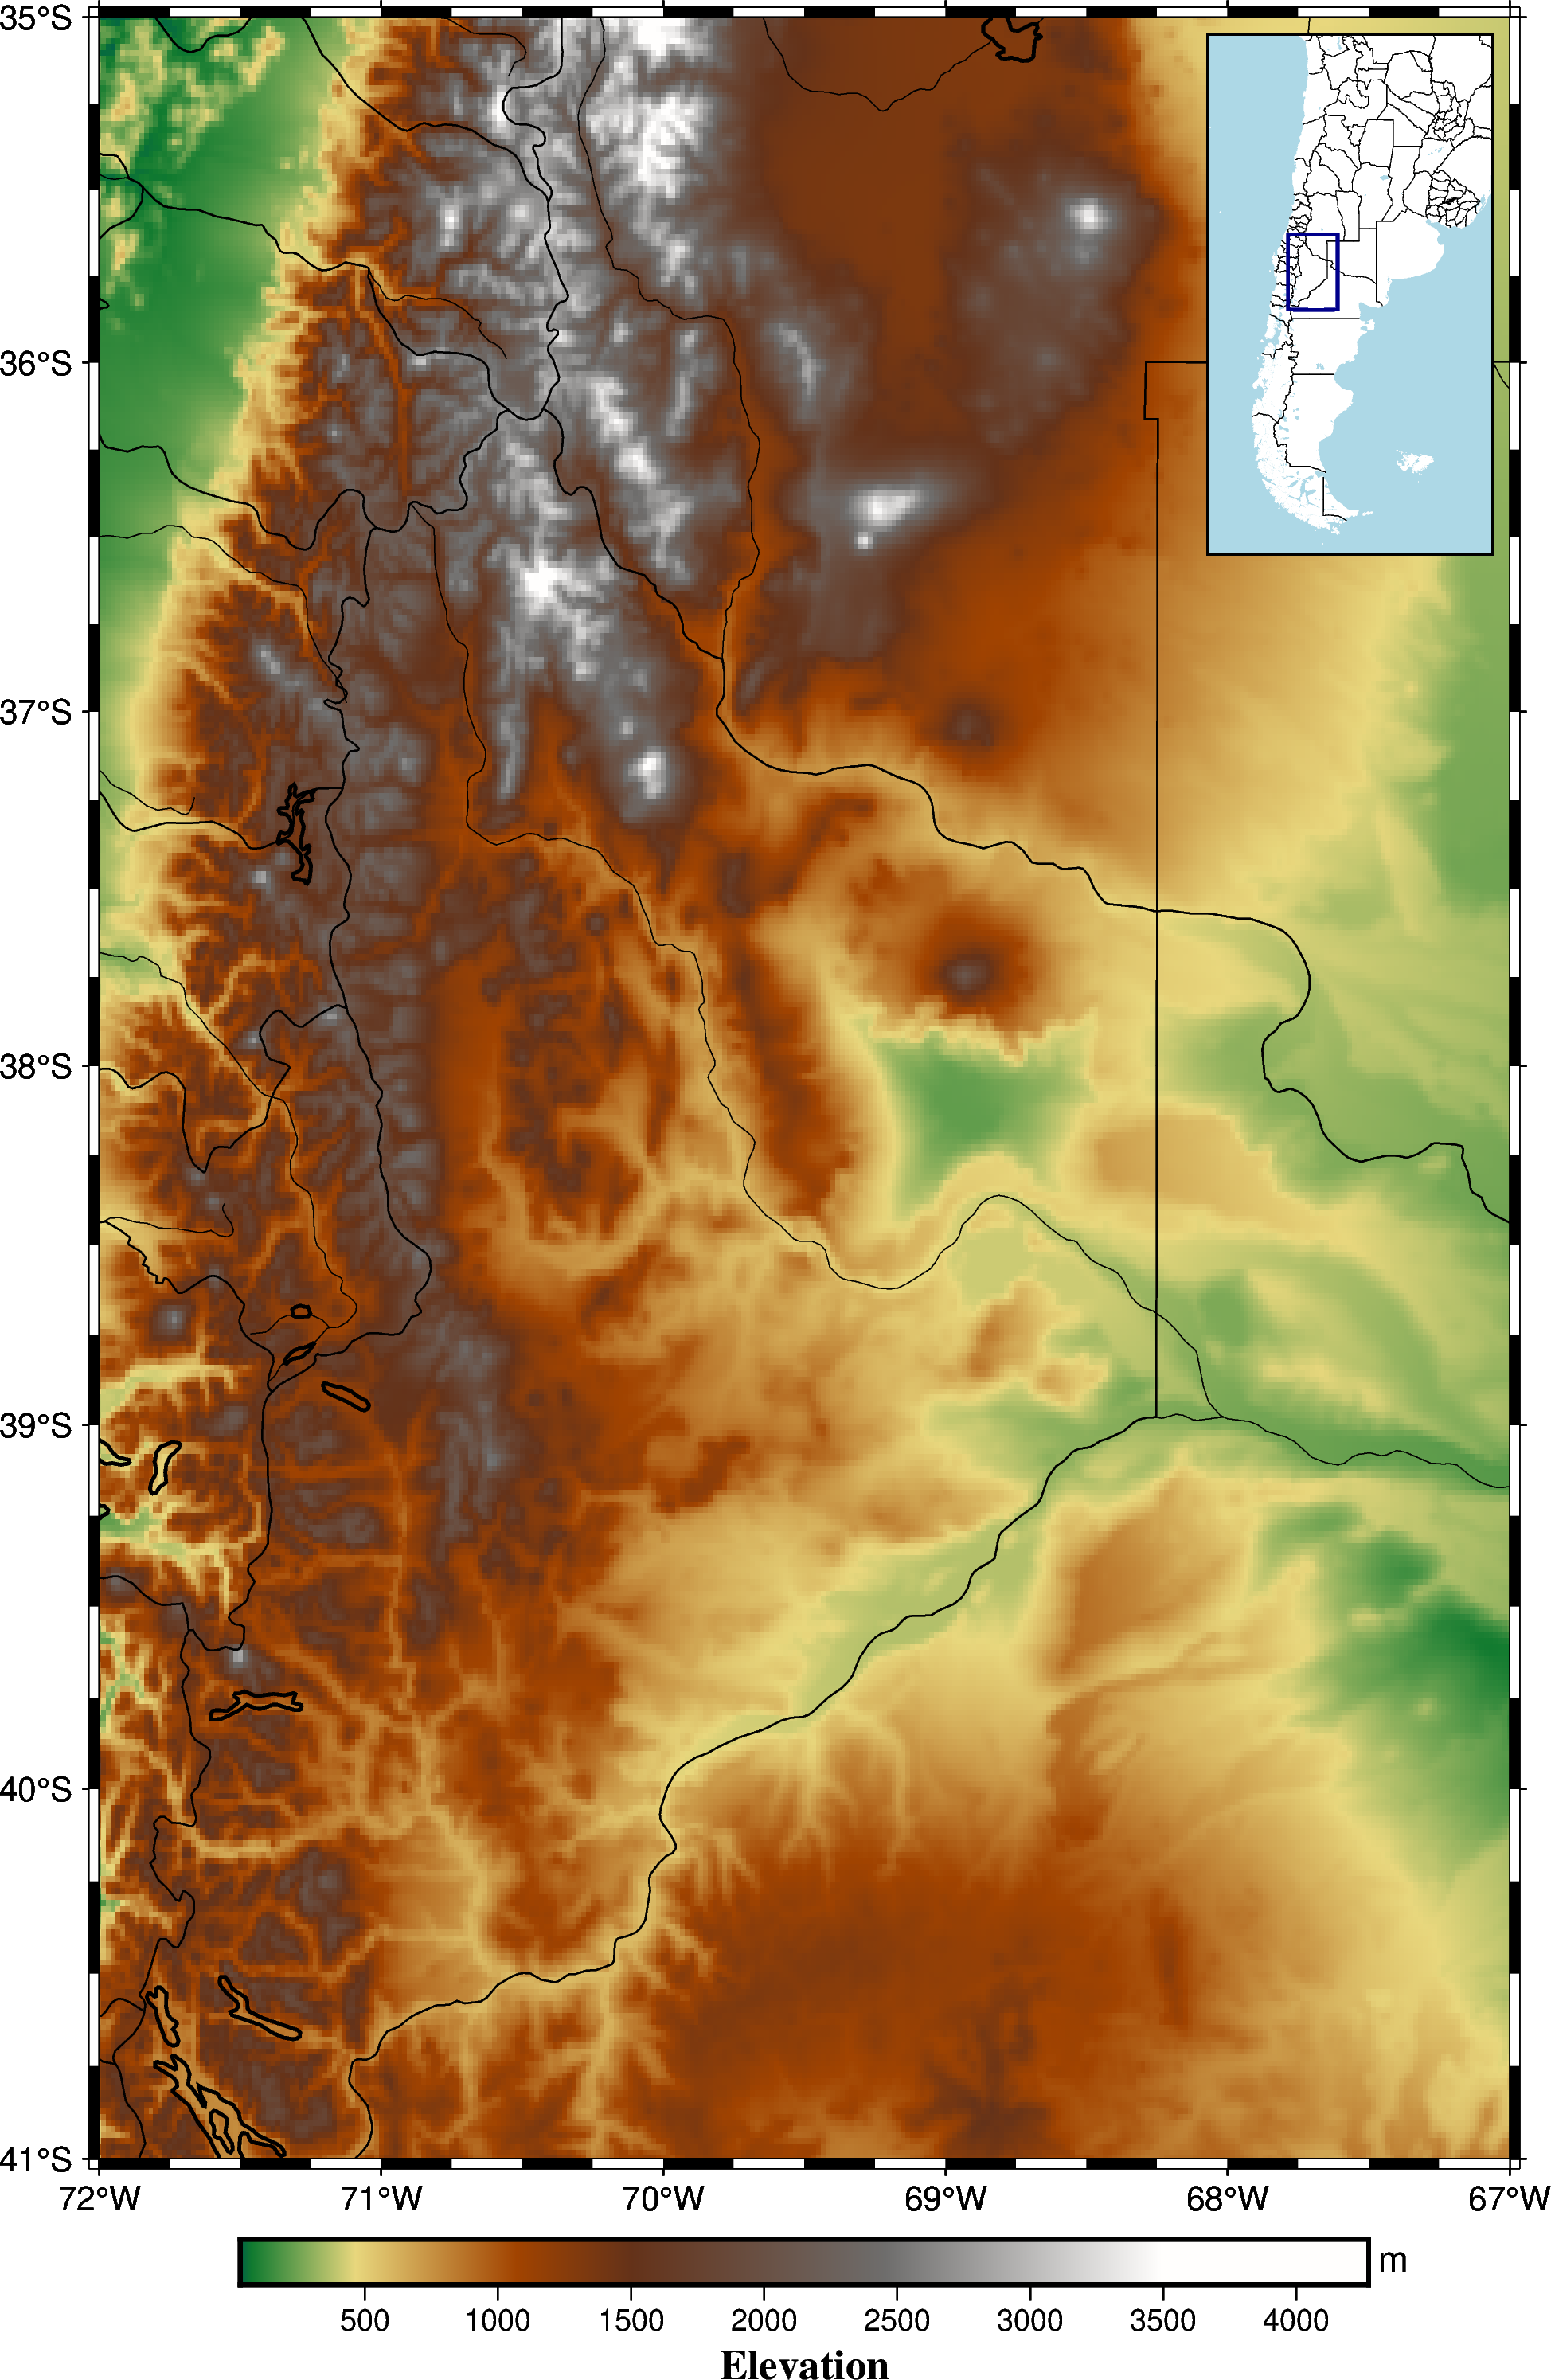

In [8]:
# Define the region of interest with longitude and latitude bounds: [west, east, south, north]
region_z = [-72, -67, -41, -35]

# Load topographic data (Earth relief) for the specified region at 1 arc-minute resolution
grid = pygmt.datasets.load_earth_relief(resolution="01m", region=region_z)

# Create a new PyGMT figure object
fig = pygmt.Figure()

# Plot the topographic data as a colored grid image using the 'geo' colormap and a 15 cm map width
fig.grdimage(grid=grid, projection="M15c", frame="a", cmap="geo")

# Add a colorbar to the map to indicate elevation values
# 'a500' sets the annotation interval, 'x+l@%5% Elevation @%%' labels the axis with a percentage font size, and 'y+lm' sets units in meters
fig.colorbar(frame=["a500", "x+l@%5% Elevation @%%", "y+lm"])

# Overlay coastlines, borders, and rivers on the map
# - region is set again to ensure consistency
# - frame=True draws the map border
# - shorelines=1 plots coastlines
# - resolution="h" uses high-resolution data
# - borders plots political boundaries (1 = national, 2 = state/province) with 0.5 point lines
# - rivers plots major rivers in gray with default line settings
fig.coast(region=region_z, frame=True, shorelines=1, resolution="h", borders=["1/0.5p", "2/0.5p"], rivers=["r", "gray", "-"])

# Add an inset map in the top right (jTR) of size 3x5.5 cm with a 0.2 cm offset
# The inset has a black frame (+pblack)
with fig.inset(position="jTR+w3c/5.5c+o0.2c", box="+pblack"):
    # Plot a regional map (larger context) within the inset
    # Shows part of South America with land in white and water in light blue
    fig.coast(region=[-80, -52, -57, -17], projection="M3c", borders=["1/0.2p", "2/0.2p"], resolution="h", land="white", water="lightblue")

    # Draw a rectangle on the inset showing the extent of the main map (region_z)
    rectangle = [[region_z[0], region_z[2], region_z[1], region_z[3]]]
    fig.plot(data=rectangle, style="r+s", pen="1p,darkblue")  # 'r+s' draws a rectangle from the given coordinates

# Save the final map as a PNG image with 300 dpi resolution
fig.savefig("topographic_map.png", dpi=300)

# Display the figure
fig.show()

### Graph of cumulative seismic events over time

CT has 4116 events left
AC with Gardner has 2842 events left
AC with Reasenberg has 3895 events left
AC with Frohlich has 1572 events left


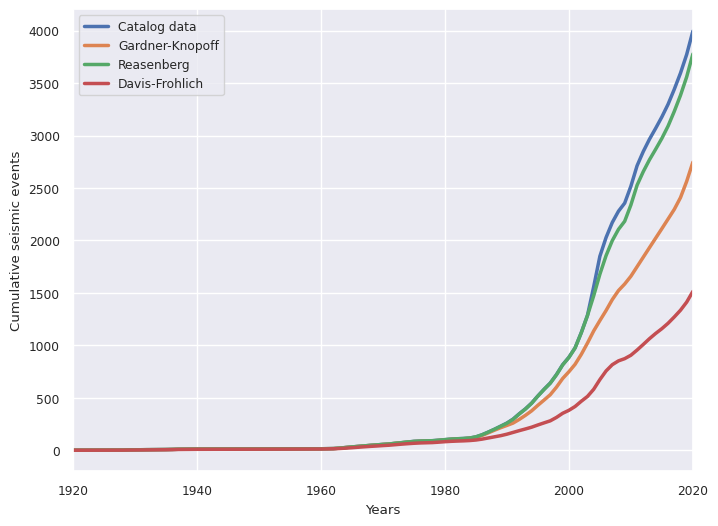

In [9]:
# Load seismic catalog data from CSV files
bc = pd.read_csv("catálogo.csv")  # 'bc': original catalog before applying any clustering
gk = pd.read_csv("GK_c.csv")      # 'gk': catalog after Gardner-Knopoff declustering
rg = pd.read_csv("R.csv")         # 'rg': catalog after Reasenberg declustering
fh = pd.read_csv("FD.csv")        # 'fh': catalog after Frohlich-Davis declustering

# Extract the columns containing the event years from each dataset
# These columns are assumed to be sorted in ascending order
yr1 = bc.iloc[:, 2]
yr2 = gk.iloc[:, 2]
yr3 = rg.iloc[:, 2]
yr4 = fh.iloc[:, 2]

# Extract another column from the original catalog (possibly used for plotting, though not used later here)
a = bc.iloc[:, 5]

# Create the main figure with a specific size
plt.figure(figsize=(8, 6))

# Set a seaborn theme with customized font size and line width
sns.set_theme(font_scale=0.8, rc={"lines.linewidth": 2.5})

# Generate cumulative event numbers for each catalog
# This creates a sequence from 0 to N-1, where N is the number of events
p1 = np.arange(len(yr1))
p2 = np.arange(len(yr2))
p3 = np.arange(len(yr3))
p4 = np.arange(len(yr4))

# Add a new column to each catalog dataframe representing the cumulative number of events
bc['Cumulative seismic events'] = p1
gk['Cumulative seismic events'] = p2
rg['Cumulative seismic events'] = p3
fh['Cumulative seismic events'] = p4

# Plot the cumulative number of events vs. year for each catalog
# The first plot is stored in variable 'a' to allow setting the x-axis limits later
a = sns.lineplot(data=bc, x="Years", y="Cumulative seismic events", legend="brief", label="Catalog data")
sns.lineplot(data=gk, x="Years", y="Cumulative seismic events", legend="brief", label="Gardner-Knopoff")
sns.lineplot(data=rg, x="Years", y="Cumulative seismic events", legend="brief", label="Reasenberg")
sns.lineplot(data=fh, x="Years", y="Cumulative seismic events", legend="brief", label="Davis-Frohlich")

# Set the x-axis limits to focus on a specific time range
a.set_xlim(1920, 2020)

# Print the number of events remaining in each catalog after declustering
print("CT has", len(p1), "events left")
print("AC with Gardner has", len(p2), "events left")
print("AC with Reasenberg has", len(p3), "events left")
print("AC with Frohlich has", len(p4), "events left")

# Save the final plot as a PNG image
plt.savefig("cumulative_seismic_events.png", dpi=300)

### Graphs

/tmp/ipython-input-10-3066331603.py:107: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


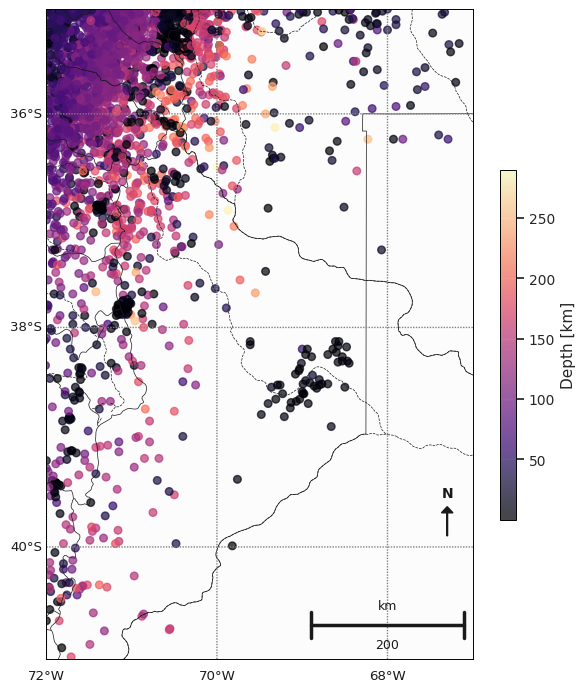

In [10]:
# Load the seismic data from a CSV file
df = pd.read_csv("GK.csv")

# Fill any missing values with 0 to avoid issues during plotting
df = df.fillna(0)

# Extract longitude, latitude, magnitude, and depth columns from the dataset
x = df.iloc[:, 0]      # Longitude
y = df.iloc[:, 1]      # Latitude
mag = df.iloc[:, 5]    # Magnitude (not used in this plot)
prof = df.iloc[:, 6]   # Depth

# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(8, 7))

# Initialize the base map using the Mercator projection and high resolution
m = Basemap(
    resolution='h',
    projection='merc',
    llcrnrlon=-72, llcrnrlat=-41,   # Lower-left corner
    urcrnrlon=-67, urcrnrlat=-35    # Upper-right corner
)

# Draw country borders
m.drawcountries(color='k')

# Draw internal administrative boundaries (e.g., provinces or states)
m.drawstates()

# Draw rivers with dashed lines
m.drawrivers(linewidth=0.5, color='k', linestyle='--')

# Fill land and ocean with color masks
m.drawlsmask(
    land_color="white",
    ocean_color="LightSteelBlue",
    alpha=0.9
)

# Draw parallels (latitude lines) and label them on the left
m.drawparallels(range(-90, 90, 2), color='grey', labels=[1, 0, 0, 0])

# Draw meridians (longitude lines) and label them on the bottom
m.drawmeridians(range(-180, 180, 2), color='grey', labels=[0, 0, 0, 1])

# Convert geographic coordinates (lat/lon) to projection coordinates
x_proj, y_proj = m(x.values, y.values)

# Create a scatter plot of the events colored by depth
h = ax.scatter(
    x_proj, y_proj,
    c=prof,                  # Color corresponds to depth
    s=30,                    # Marker size
    alpha=0.7,               # Transparency
    cmap='magma'             # Colormap
)

# Set an empty title and enable grid
plt.title("")
plt.grid()

# Add a scale bar to the map
m.drawmapscale(
    -68, -40.7,              # Position of the scale
    -66.5, -34.5,            # Reference point
    200,                     # Scale in kilometers
    barstyle='simple'
)

# Draw a north arrow manually
lon_n, lat_n = -67.3, -39.9               # Arrow base coordinates
x_n, y_n = m(lon_n, lat_n)                # Project to map coordinates

# Draw the north arrow as an upward arrow
plt.arrow(
    x_n, y_n, 0, 30000,                   # Starting point and vector
    width=1000,                           # Width of the arrow shaft
    head_width=15000, head_length=8000,   # Size of the arrowhead
    fc='k', ec='k', zorder=10             # Fill and edge color
)

# Label the arrow with an "N" for north
plt.text(
    x_n, y_n + 47000, 'N',
    fontsize=10, fontweight='bold',
    ha='center', va='bottom',
    color='k', zorder=10
)

# Manually add a colorbar to control its size and position precisely
cax = fig.add_axes([0.80, 0.25, 0.02, 0.5])  # Position: [left, bottom, width, height]
cbar = fig.colorbar(h, cax=cax)
cbar.set_label('Depth [km]', fontsize=11)   # Label for the colorbar
cbar.ax.tick_params(labelsize=10)           # Tick label size

# Add a black border around the map axes
for spine in ax.spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(0.7)

# Add a black border around the colorbar
for spine in cbar.ax.spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(0.7)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

# Save the figure as a PNG with high resolution and tight bounding box
fig.savefig('event_depth.png', dpi=300, bbox_inches='tight')


/tmp/ipython-input-11-2410210368.py:107: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


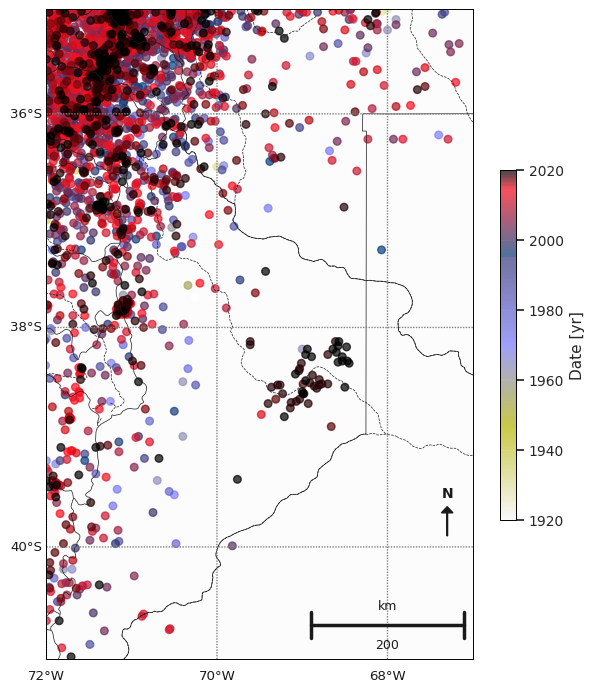

In [11]:
# Load seismic event data from a CSV file
df = pd.read_csv("GK.csv")

# Fill any missing values in the dataset with 0
df = df.fillna(0)

# Extract relevant columns: longitude, latitude, year, magnitude, and depth
x = df.iloc[:, 0]       # Longitude
y = df.iloc[:, 1]       # Latitude
year = df.iloc[:, 2]    # Year of the event
mag = df.iloc[:, 5]     # Magnitude (not used in this plot)
prof = df.iloc[:, 6]    # Depth (not used in this plot)

# Create a figure and axes for the plot
fig, ax = plt.subplots(figsize=(8, 7))

# Initialize a Basemap object using the Mercator projection and high-resolution map boundaries
m = Basemap(
    resolution='h',
    projection='merc',
    llcrnrlon=-72, llcrnrlat=-41,  # Lower-left corner of the map
    urcrnrlon=-67, urcrnrlat=-35   # Upper-right corner of the map
)

# Draw borders for countries and provinces/states
m.drawcountries(color='k')
m.drawstates()

# Draw rivers as dashed lines
m.drawrivers(linewidth=0.5, color='k', linestyle='--')

# Mask land and ocean with specified colors
m.drawlsmask(
    land_color="white",
    ocean_color="LightSteelBlue",
    alpha=0.9
)

# Draw parallels (latitude) every 2 degrees and label them on the left side
m.drawparallels(range(-90, 90, 2), color='grey', labels=[1, 0, 0, 0])

# Draw meridians (longitude) every 2 degrees and label them at the bottom
m.drawmeridians(range(-180, 180, 2), color='grey', labels=[0, 0, 0, 1])

# Convert geographic coordinates (longitude and latitude) to the map projection coordinates
x_proj, y_proj = m(x.values, y.values)

# Create a scatter plot of events, colored by year of occurrence
# Using the 'gist_stern_r' colormap, which emphasizes variation over time
h = ax.scatter(
    x_proj, y_proj,
    c=year,                   # Color-coded by year
    s=30,                     # Marker size
    alpha=0.7,                # Transparency
    cmap='gist_stern_r'      # Colormap reversed for better contrast
)

# Add an empty title and enable grid lines
plt.title("")
plt.grid()

# Draw a scale bar on the map indicating 200 km
m.drawmapscale(
    -68, -40.7,              # Position on the map
    -66.5, -34.5,            # Reference point (ignored here)
    200,                     # Length of the scale in kilometers
    barstyle='simple'
)

# Draw a north arrow to indicate map orientation
lon_n, lat_n = -67.3, -39.9              # Coordinates for arrow placement
x_n, y_n = m(lon_n, lat_n)               # Projected map coordinates

# Draw the arrow pointing north
plt.arrow(
    x_n, y_n, 0, 30000,                  # Base and height
    width=1000,                          # Arrow shaft width
    head_width=15000, head_length=8000,  # Arrowhead dimensions
    fc='k', ec='k', zorder=10            # Fill and edge color
)

# Add the letter 'N' above the arrow to indicate North
plt.text(
    x_n, y_n + 47000, 'N',
    fontsize=10, fontweight='bold',
    ha='center', va='bottom',
    color='k', zorder=10
)

# Manually add a colorbar with a custom position on the figure
cax = fig.add_axes([0.80, 0.25, 0.02, 0.5])  # [left, bottom, width, height]
cbar = fig.colorbar(h, cax=cax)
cbar.set_label('Date [yr]', fontsize=11)     # Label for the colorbar
cbar.ax.tick_params(labelsize=10)            # Size of colorbar ticks

# Add a black border around the map plot area
for spine in ax.spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(0.7)

# Add a black border around the colorbar
for spine in cbar.ax.spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(0.7)

# Optimize layout and display the plot
plt.tight_layout()
plt.show()

# Save the figure as a high-resolution PNG file with tight bounding box
fig.savefig('event_years.png', dpi=300, bbox_inches='tight')

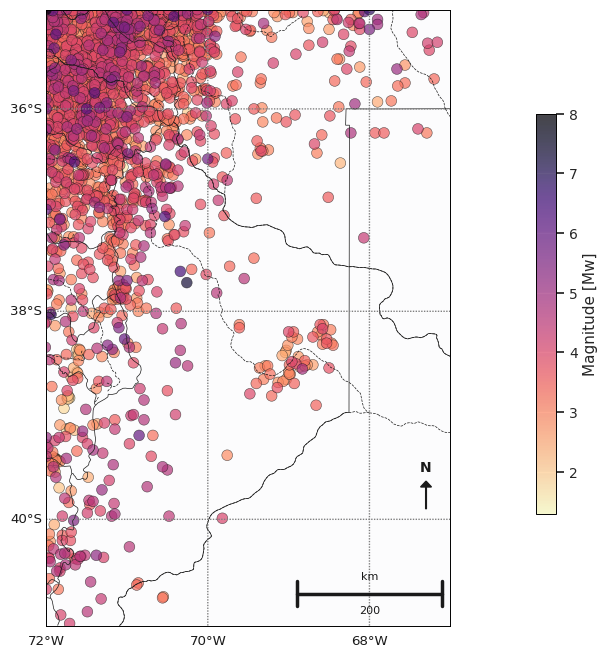

In [21]:
# Load seismic data from a CSV file
df = pd.read_csv("GK1.csv")

# Extract longitude, latitude, and magnitude columns
x = df.iloc[:, 0]     # Longitude
y = df.iloc[:, 1]     # Latitude
mag = df.iloc[:, 5]   # Magnitude of the seismic events

# Create a figure and axis for plotting
fig, ax = plt.subplots(figsize=(10, 8))

# Initialize the base map using the Mercator projection and high resolution
m = Basemap(
    resolution='h',
    projection='merc',
    llcrnrlon=-72, llcrnrlat=-41,  # Lower-left corner
    urcrnrlon=-67, urcrnrlat=-35   # Upper-right corner
)

# Draw political and geographic features on the map
m.drawcountries(color='k')              # Country borders in black
m.drawstates()                          # Provincial or state borders
m.drawrivers(linewidth=0.5, color='k', linestyle='--')  # Rivers as dashed lines
m.drawlsmask(land_color="white", ocean_color="LightSteelBlue", alpha=0.9)  # Land/ocean fill

# Draw gridlines for latitude and longitude
m.drawparallels(range(-90, 90, 2), color='grey', labels=[1, 0, 0, 0])  # Latitude labels on the left
m.drawmeridians(range(-180, 180, 2), color='grey', labels=[0, 0, 0, 1])  # Longitude labels at the bottom

# Choose a colormap and normalize it to the magnitude range
cmap = plt.colormaps['magma_r']  # Reversed magma colormap
norm = plt.Normalize(vmin=mag.min(), vmax=mag.max())  # Normalize between min and max magnitude

# Convert geographic coordinates to the map projection
x_proj, y_proj = m(x.values, y.values)

# Plot the seismic events using a scatter plot, color-coded by magnitude
sc = ax.scatter(
    x_proj, y_proj,
    alpha=0.7,
    s=60,                     # Marker size
    c=mag,                   # Color by magnitude
    cmap=cmap, norm=norm,
    edgecolors='k', linewidths=0.4  # Black edges around markers
)

# Draw a scale bar indicating 200 km
m.drawmapscale(
    -68, -40.7, -66.5, -34.5,  # Location of the scale
    200,                       # Length in kilometers
    barstyle='simple',
    fontsize=8
)

# Draw a north arrow manually on the map
lon_n, lat_n = -67.3, -39.9
x_n, y_n = m(lon_n, lat_n)

plt.arrow(
    x_n, y_n, 0, 30000,               # Arrow vector (north direction)
    width=1000,
    head_width=15000, head_length=8000,
    fc='k', ec='k', zorder=10         # Fill and edge in black
)

plt.text(
    x_n, y_n + 47000, 'N',            # Label 'N' above the arrow
    fontsize=10, fontweight='bold',
    ha='center', va='bottom',
    color='k', zorder=10
)

# Manually add the colorbar and position it precisely
cax = fig.add_axes([0.80, 0.25, 0.02, 0.5])  # [left, bottom, width, height]
cbar = fig.colorbar(sc, cax=cax)
cbar.set_label('Magnitude [Mw]', fontsize=11)
cbar.ax.tick_params(labelsize=10)

# Add a black frame around the map plot
for spine in ax.spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(0.7)

# Add a black frame around the colorbar
for spine in cbar.ax.spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(0.7)

# Display the figure
plt.show()

# Save the figure as a PNG with high resolution
fig.savefig('events_magnitud.png', dpi=300, bbox_inches='tight')

### **Seismogenic zone**

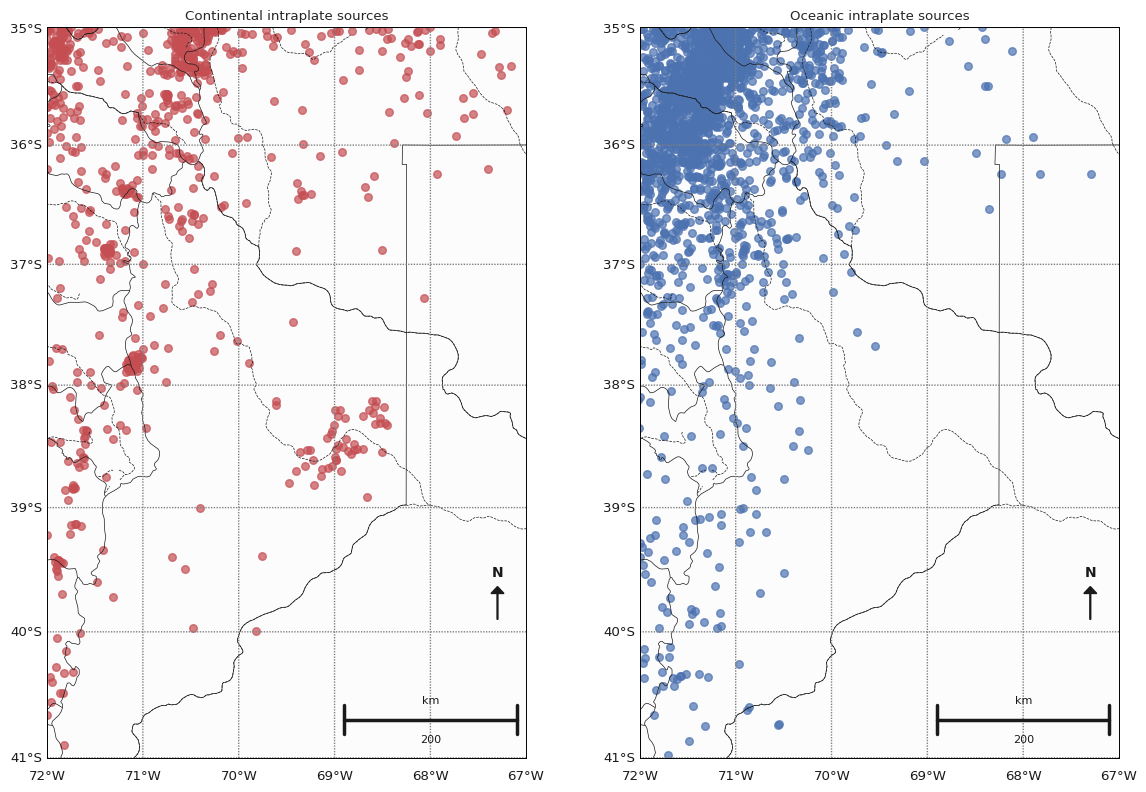

In [14]:
# Load data
df = pd.read_csv("GK.csv")

# Replace NaN values with zeros
df = df.fillna(0)

# Extract coordinates, magnitude and depth
x = df.iloc[:, 0]
y = df.iloc[:, 1]
mag = df.iloc[:, 5]
prof = df.iloc[:, 6]

# Create figure with two subplots
fig, ax = plt.subplots(1, 2, figsize=(12, 8))

# --- MAP 1: Continental Intraplate Sources ---
m1 = Basemap(resolution='h', projection='merc',
             llcrnrlon=-72, llcrnrlat=-41,
             urcrnrlon=-67, urcrnrlat=-35,
             ax=ax[0])

# Draw geographical features
m1.drawstates()
m1.drawcountries(color='k')
m1.drawrivers(linewidth=0.5, color='k', linestyle='--')
m1.drawlsmask(land_color="white", ocean_color="LightSteelBlue", alpha=0.9)
m1.drawparallels(range(-90, 90, 1), color='grey', labels=[1, 0, 0, 0])
m1.drawmeridians(range(-180, 180, 1), color='grey', labels=[0, 0, 0, 1])
m1.drawmapscale(-68, -40.7, -66.5, -34.5, 200, barstyle='simple', fontsize=8)

# Draw north arrow
lon_n, lat_n = -67.3, -39.9
x_n1, y_n1 = m1(lon_n, lat_n)
ax[0].arrow(x_n1, y_n1, 0, 30000, width=1000, head_width=15000, head_length=8000, fc='k', ec='k', zorder=10)
ax[0].text(x_n1, y_n1 + 47000, 'N', fontsize=10, fontweight='bold', ha='center', va='bottom', color='k', zorder=10)

# Filter and project shallow events (depth ≤ 50 km)
SISMO_PROF = df.query('depth <= 50')
X_P, Y_P = SISMO_PROF.iloc[:, 0], SISMO_PROF.iloc[:, 1]
X_P, Y_P = m1(X_P.values, Y_P.values)

# Plot shallow seismic events in red
ax[0].scatter(X_P, Y_P, c="r", alpha=0.7, s=30)
ax[0].set_title("Continental intraplate sources")
ax[0].grid()

# --- MAP 2: Oceanic Intraplate Sources ---
m2 = Basemap(resolution='h', projection='merc',
             llcrnrlon=-72, llcrnrlat=-41.,
             urcrnrlon=-67, urcrnrlat=-35,
             ax=ax[1])

# Draw geographical features
m2.drawstates()
m2.drawcountries(color='k')
m2.drawrivers(linewidth=0.5, color='k', linestyle='--')
m2.drawlsmask(land_color="white", ocean_color="LightSteelBlue", alpha=0.9)
m2.drawparallels(range(-90, 90, 1), color='grey', labels=[1, 0, 0, 0])
m2.drawmeridians(range(-180, 180, 1), color='grey', labels=[0, 0, 0, 1])
m2.drawmapscale(-68, -40.7, -66.5, -34.5, 200, barstyle='simple', fontsize=8)

# Draw north arrow
x_n2, y_n2 = m2(lon_n, lat_n)
ax[1].arrow(x_n2, y_n2, 0, 30000, width=1000, head_width=15000, head_length=8000, fc='k', ec='k', zorder=10)
ax[1].text(x_n2, y_n2 + 47000, 'N', fontsize=10, fontweight='bold', ha='center', va='bottom', color='k', zorder=10)

# Filter and project deep events (depth > 50 km)
SISMO_SUP = df.query('depth > 50')
X_S, Y_S = SISMO_SUP.iloc[:, 0], SISMO_SUP.iloc[:, 1]
X_S, Y_S = m2(X_S.values, Y_S.values)

# Plot deep seismic events in blue
ax[1].scatter(X_S, Y_S, c="b", alpha=0.7, s=30)
ax[1].set_title("Oceanic intraplate sources")
ax[1].grid()

# Add black frame to each map
for axis in ax:
    for spine in axis.spines.values():
        spine.set_edgecolor('black')
        spine.set_linewidth(0.7)

# Show and save figure
plt.tight_layout()
plt.show()
fig.savefig('GK_sources.png', dpi=300, bbox_inches='tight')

### **MAP PGA**

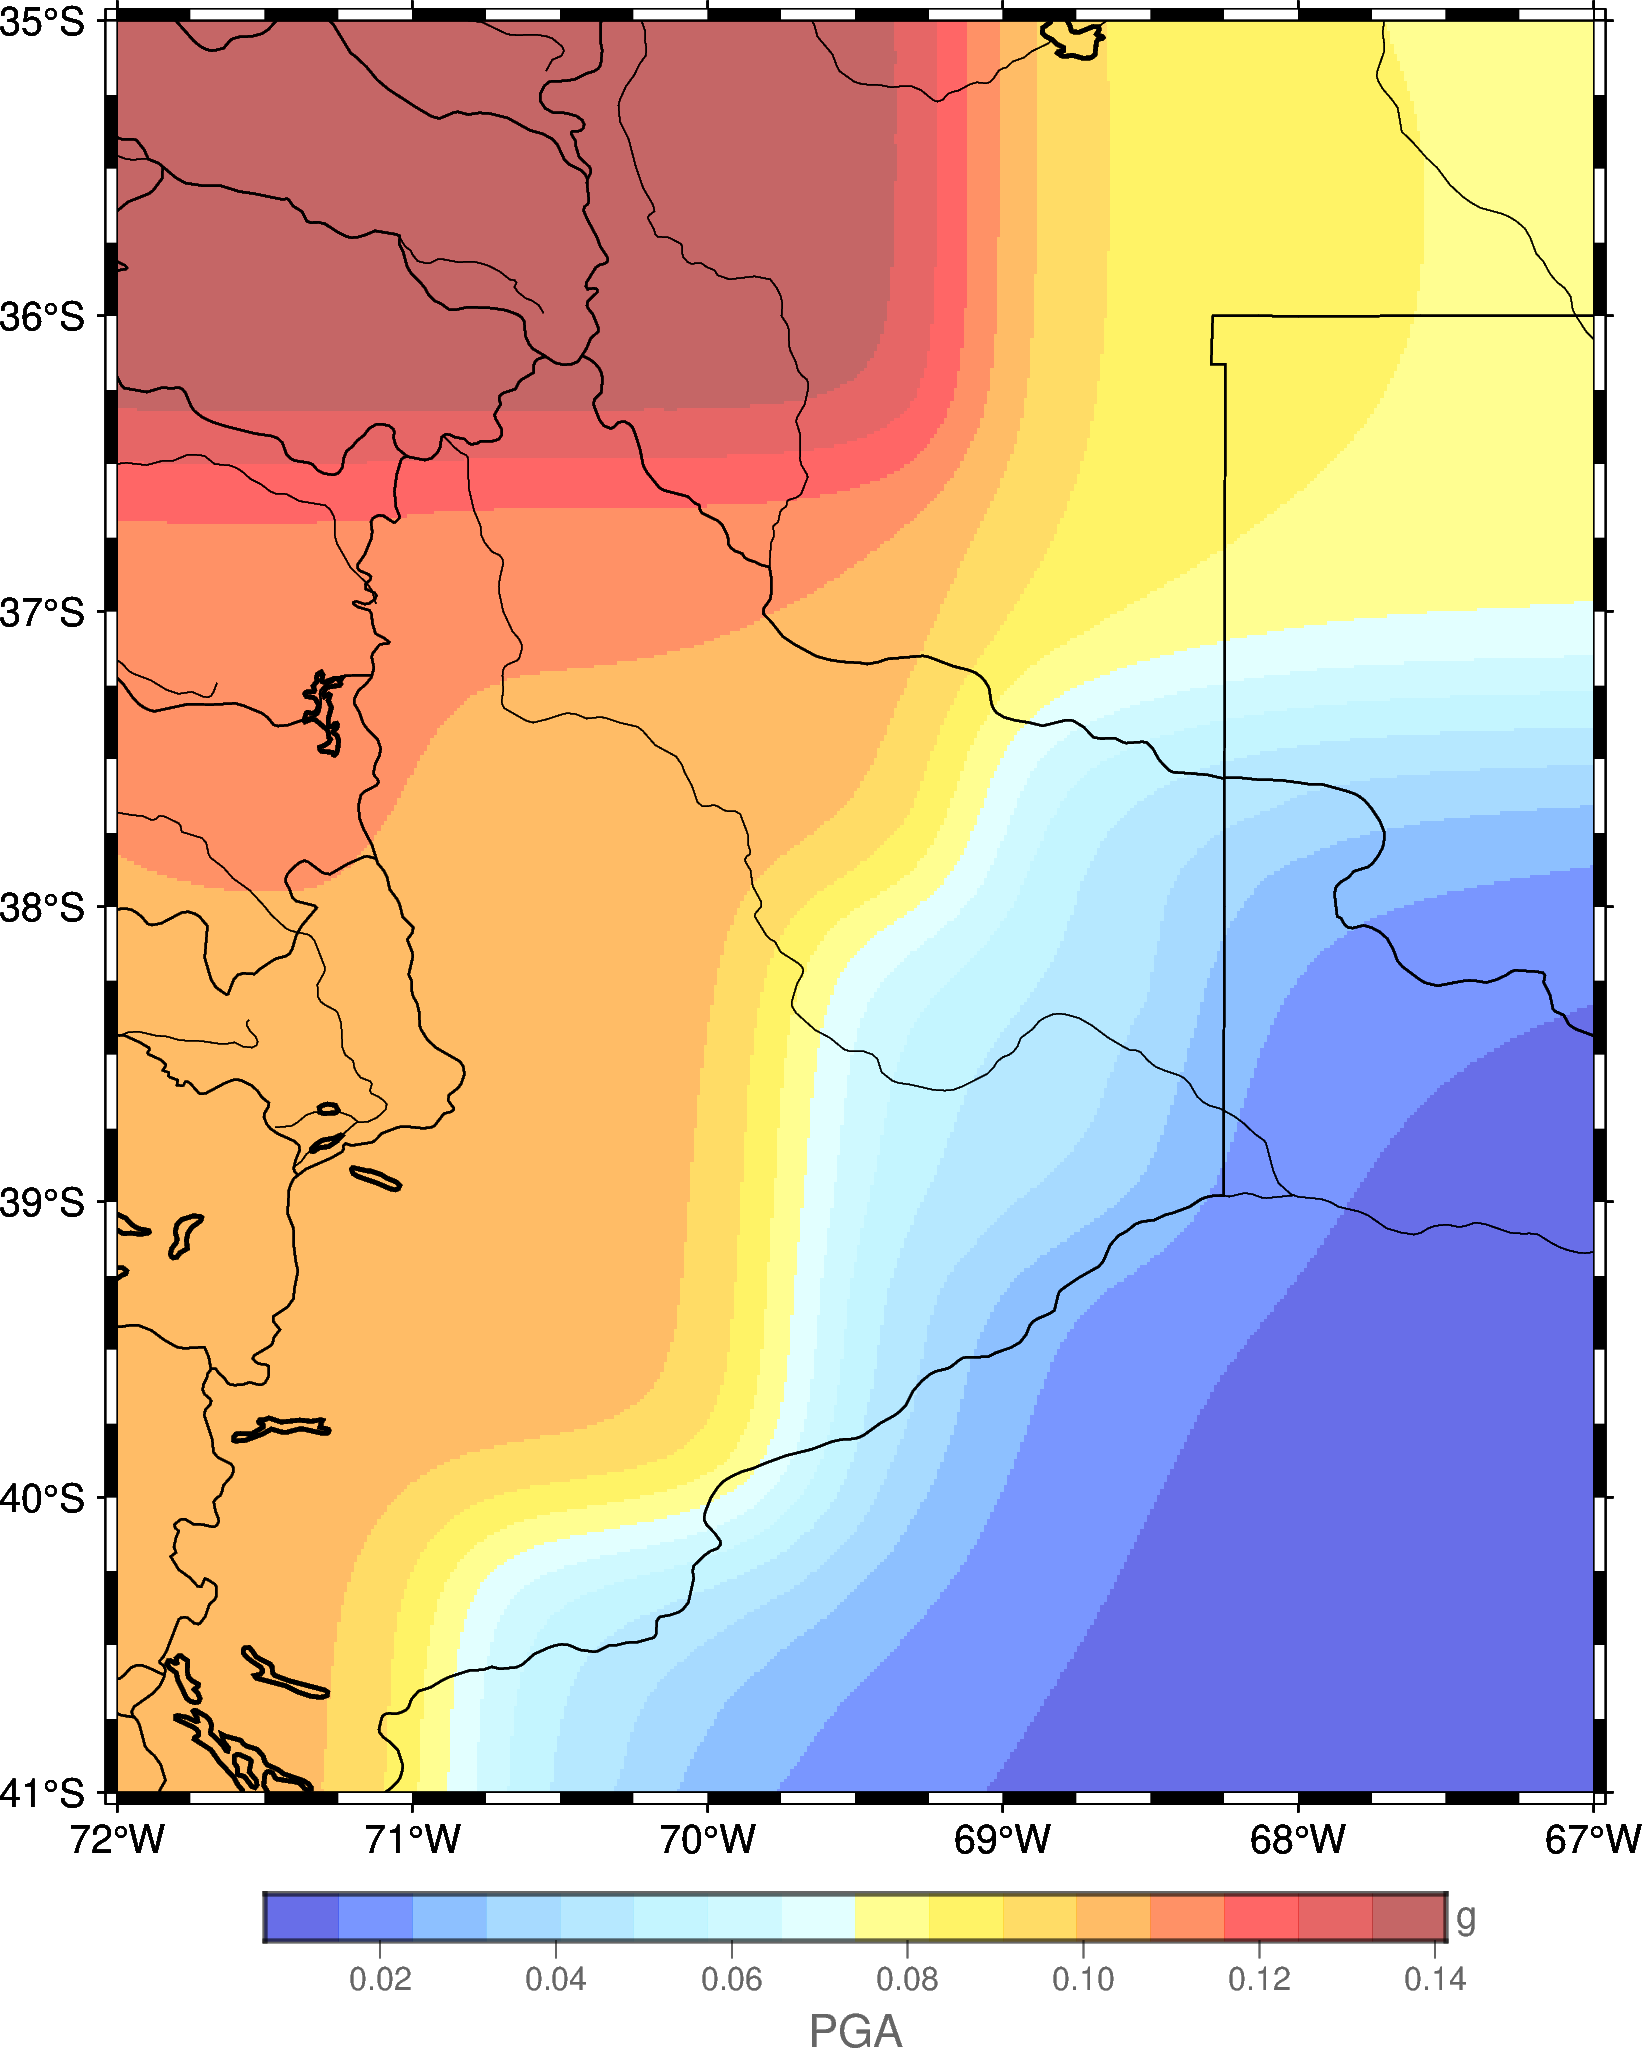

In [20]:
# Generate a gridded surface (interpolated grid) from the point data in "PGA_475.csv"
# The interpolation uses a spacing of 0.1 degrees within the specified region
# The result is saved to a file called "grilla.grd"
pygmt.surface(data="PGA_475.csv", region=[-72, -67, -41, -35], spacing=0.1, outgrid="grilla.grd")

# Create a new PyGMT figure object
fig = pygmt.Figure()

# Add coastlines, borders, and rivers to the map for geographic context
fig.coast(
    region=[-72, -67, -41, -35],  # Define the map extent: [west, east, south, north]
    frame=True,                   # Draw map frame
    shorelines=1,                 # Add shoreline at default thickness
    resolution="h",               # Use high-resolution coastline data
    borders=["1/0.5p", "2/0.5p"], # Draw country (1) and state/province (2) borders with 0.5-point pen
    rivers=["r", "-"]             # Plot major rivers using default style
)

# Plot the interpolated grid as a colored image with partial transparency
fig.grdimage(
    grid="grilla.grd",       # Use the previously generated grid file
    transparency=40,         # Set grid transparency to 40%
    cmap="panoply",          # Use the "panoply" colormap
    frame=True,              # Draw frame around the image
    dpi="90"                 # Set resolution to 90 dpi
)

# Add a colorbar to indicate the scale of PGA values (e.g., ground acceleration)
fig.colorbar(
    frame=["xa0.02f0.02+lPGA", "y+lg"],  # Set axis annotations every 0.02 units, add "PGA" and "g" labels
    transparency=40                      # Match colorbar transparency to the grid image
)

# Re-plot coastlines and geographic features to ensure they appear above the grid
fig.coast(
    region=[-72, -67, -41, -35],
    frame=True,
    shorelines=1,
    resolution="h",
    borders=["1/0.5p", "2/0.5p"],
    rivers=["r", "gray", "-"]  # Draw rivers in gray over the grid
)

# Save the final map to a PNG file
fig.savefig("PGA.png")

# Display the map
fig.show()

### **MAP T=0.2s**

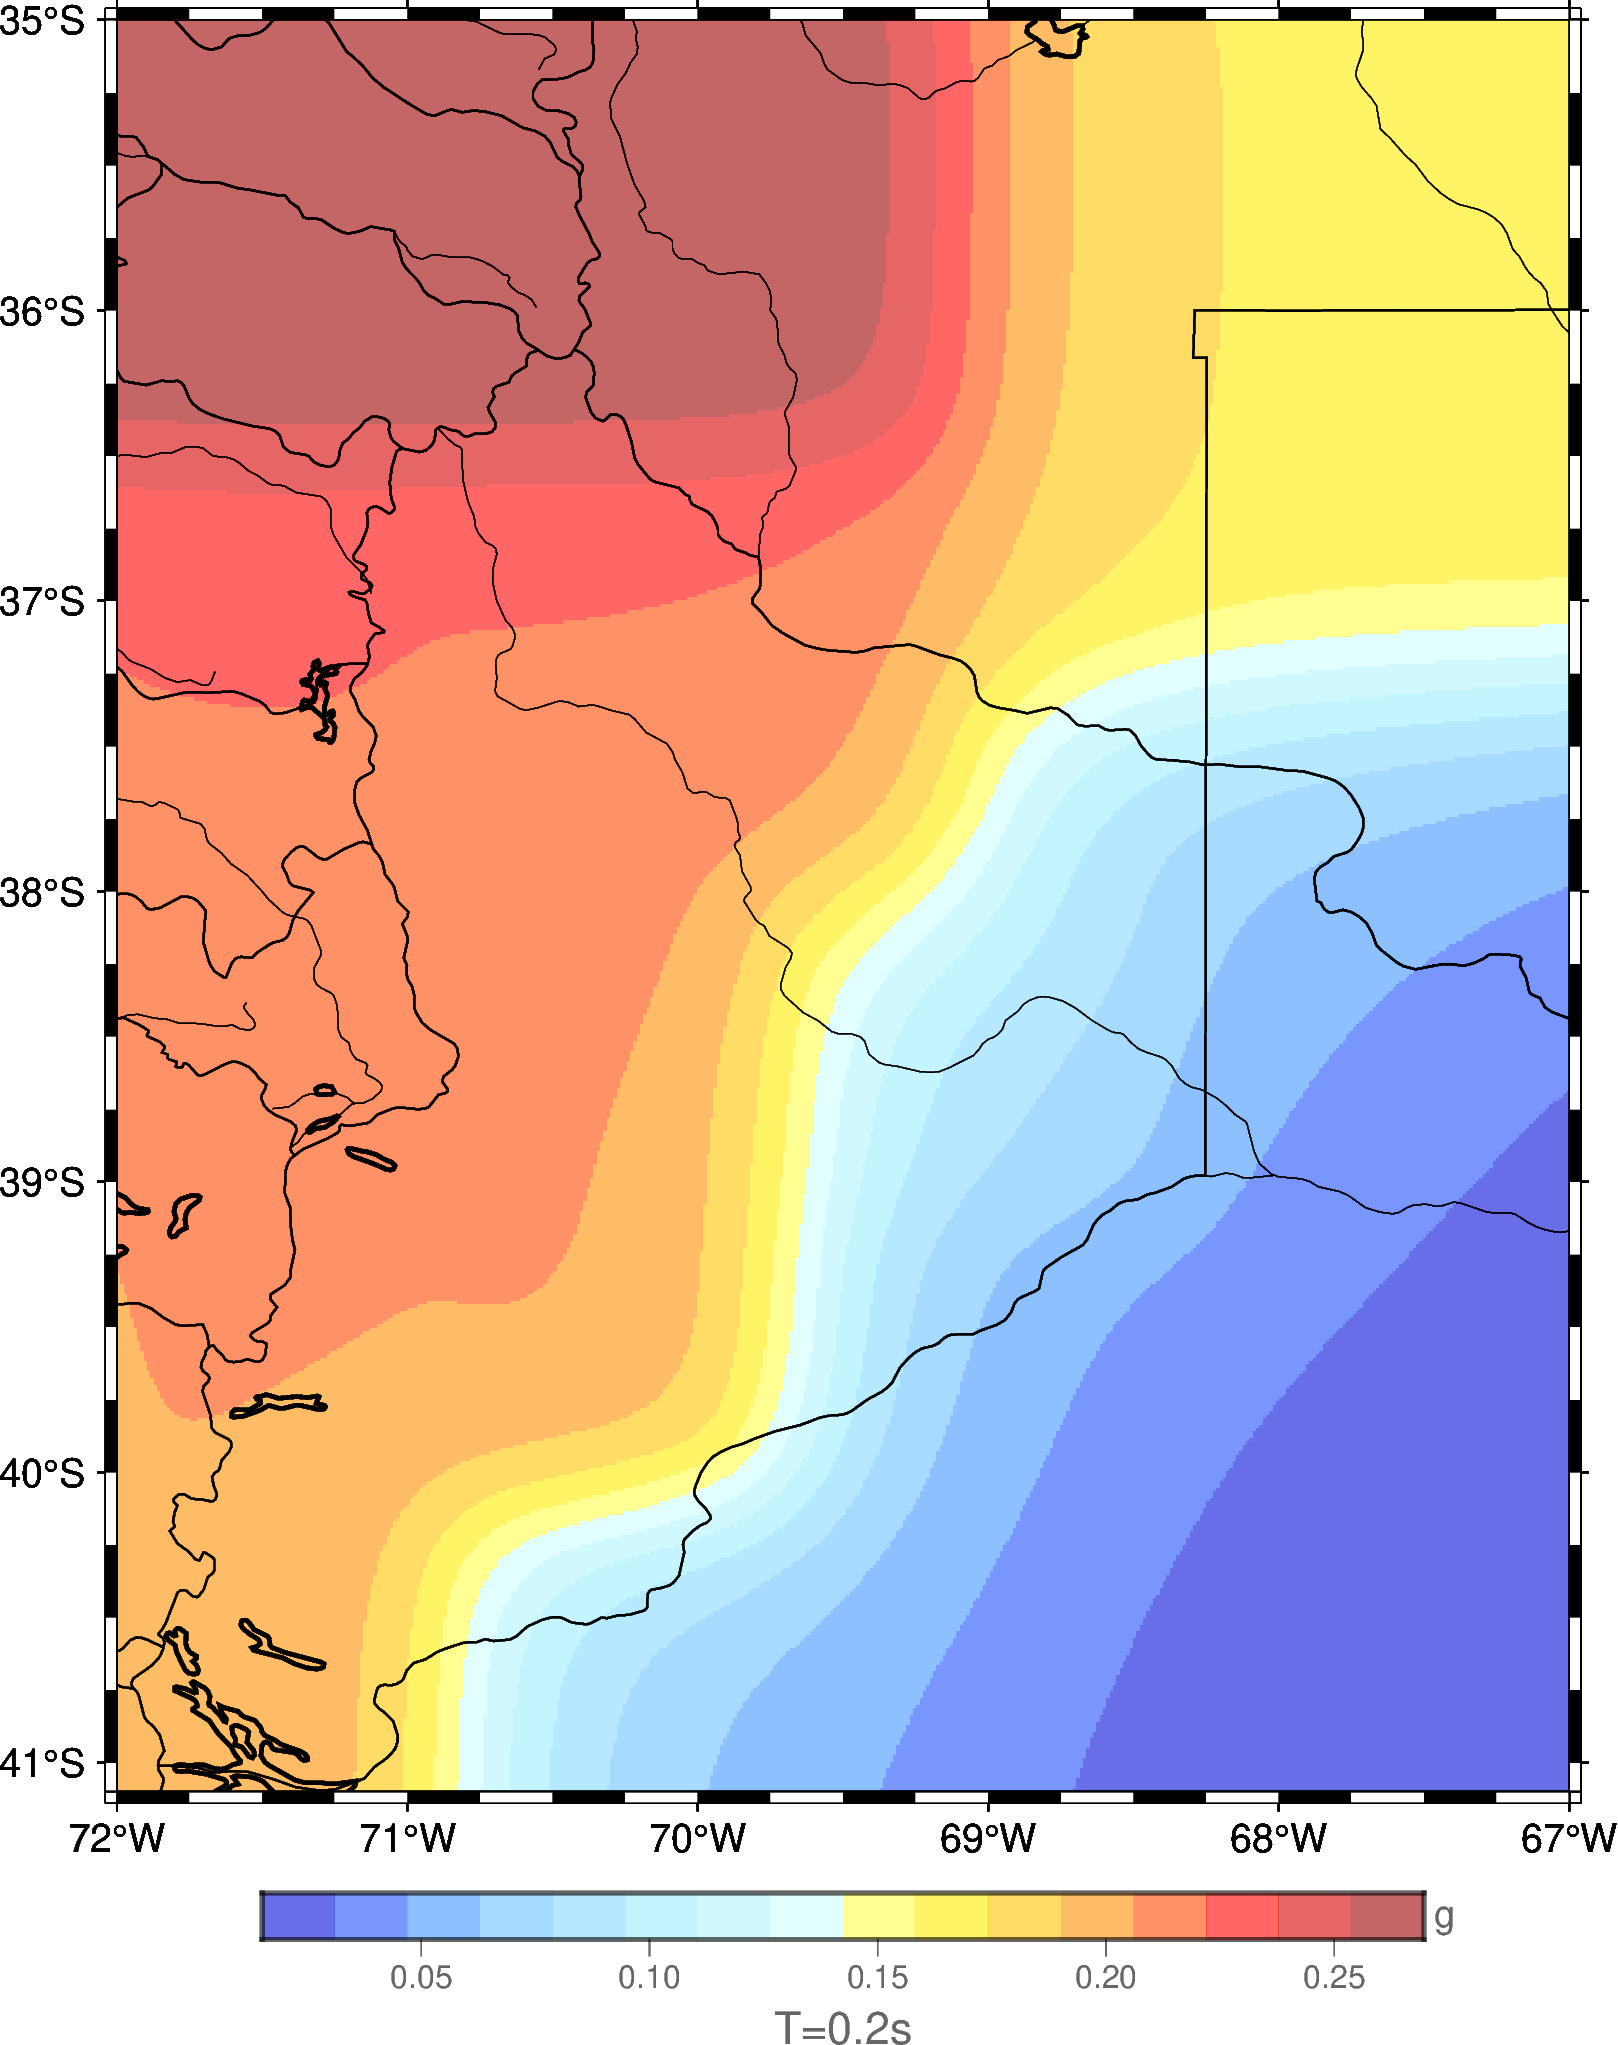

In [19]:
# Interpolate a grid surface from the point data in "T02.csv"
# The interpolation is done over the specified region with 0.1° grid spacing
# The resulting grid is saved as "grilla.grd"
pygmt.surface(data="T02.csv", region=[-72, -67, -41.1, -35], spacing=0.1, outgrid="grilla.grd")

# Create a new PyGMT figure
fig = pygmt.Figure()

# Plot coastlines, political borders, and rivers for geographic reference
fig.coast(
    region=[-72, -67, -41.1, -35],  # Map extent: [west, east, south, north]
    frame=True,                     # Draw the map frame
    shorelines=1,                   # Add default shorelines
    resolution="h",                 # Use high-resolution coastline data
    borders=["1/0.5p", "2/0.5p"],   # Country and province/state borders with 0.5-point lines
    rivers=["r", "-"]               # Plot major rivers using default styling
)

# Plot the interpolated grid as a colored image with transparency
fig.grdimage(
    grid="grilla.grd",     # Input grid file
    transparency=40,       # Set 40% transparency
    cmap="panoply",        # Use the "panoply" colormap
    frame=True,            # Enable map frame
    dpi="90"               # Set display resolution
)

# Add a colorbar to represent the interpolated values for T = 0.2 seconds
fig.colorbar(
    frame=["xa0.05f0.05+lT=0.2s", "y+lg"],  # Customize axis ticks and label with units in g
    transparency=40                         # Match transparency with the grid
)

# Re-draw coastlines and features so they appear on top of the grid image
fig.coast(
    region=[-72, -67, -41.1, -35],
    frame=True,
    shorelines=1,
    resolution="h",
    borders=["1/0.5p", "2/0.5p"],
    rivers=["r", "gray", "-"]  # Plot rivers again, this time in gray to stand out over the grid
)

# Save the map as a PNG image
fig.savefig("T02s.png")

# Display the resulting figure
fig.show()


### **MAP T=1s**

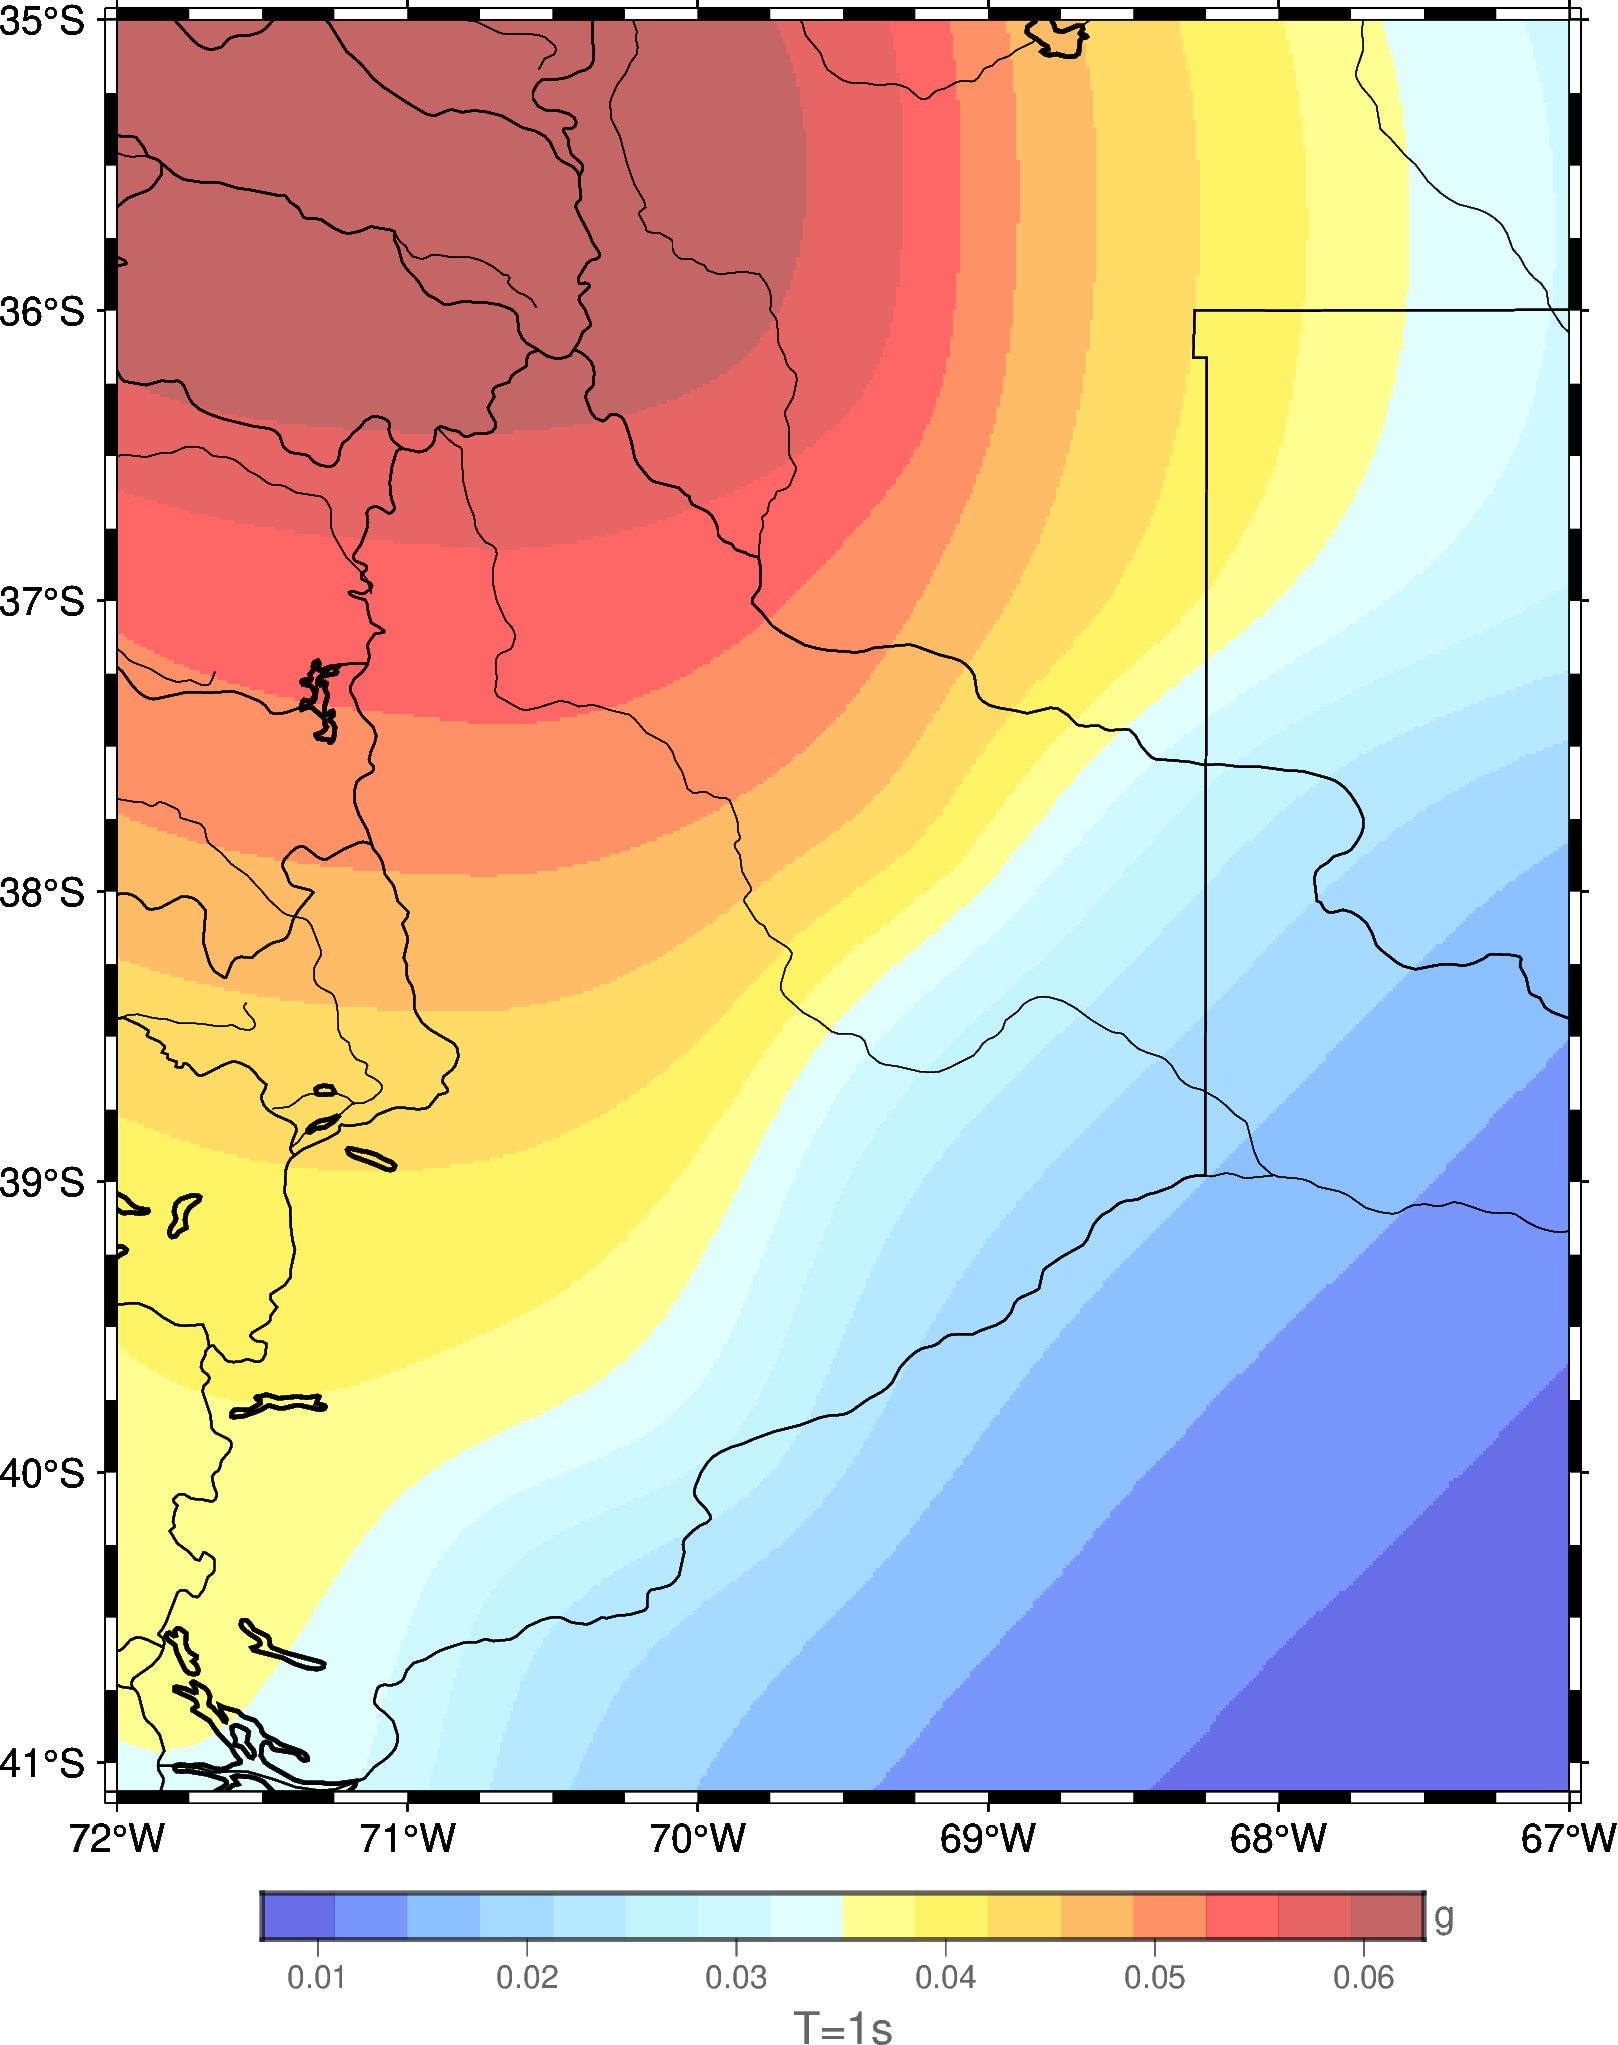

In [18]:
# Interpolate a grid surface from point data in "T1.csv"
# The interpolation covers the specified geographic region with a grid spacing of 0.1°
# The resulting grid is saved as "grilla.grd"
pygmt.surface(data="T1.csv", region=[-72, -67, -41.1, -35], spacing=0.1, outgrid="grilla.grd")

# Create a new figure object
fig = pygmt.Figure()

# Plot base geographic features: coastlines, borders, and rivers
fig.coast(
    region=[-72, -67, -41.1, -35],  # Map extent: [west, east, south, north]
    frame=True,                     # Display frame around the map
    shorelines=1,                   # Draw shorelines
    resolution="h",                 # Use high-resolution map features
    borders=["1/0.5p", "2/0.5p"],   # Draw country and province/state borders with 0.5-point lines
    rivers=["r", "-"]               # Draw major rivers with default style
)

# Plot the interpolated grid as a color image with semi-transparency
fig.grdimage(
    grid="grilla.grd",     # Grid file to display
    transparency=40,       # Apply 40% transparency to the image
    cmap="panoply",        # Use the "panoply" colormap
    frame=True,            # Include map frame
    dpi="90"               # Set rendering resolution
)

# Add a colorbar to indicate values of the interpolated variable for T = 1.0 second
fig.colorbar(
    frame=["xa0.01f0.01+lT=1s", "y+lg"],  # Set major and minor ticks, label, and units in g
    transparency=40                       # Apply same transparency as the grid
)

# Re-plot coastlines, borders, and rivers so they appear above the grid layer
fig.coast(
    region=[-72, -67, -41.1, -35],
    frame=True,
    shorelines=1,
    resolution="h",
    borders=["1/0.5p", "2/0.5p"],
    rivers=["r", "gray", "-"]  # Re-draw rivers in gray for better visibility over the grid
)

# Export the final map as a PNG image
fig.savefig("T1sec.png")

# Display the resulting map
fig.show()